# Project Part 1

# Classification Task:

In this section, we find the best classifier that can be used to predict the variable - 'Attrition' based on the various features present in the dataset.

As in our case, it is critical to classify Attrition correctly we will be considering Recall of 1 (as we wish to have less False Negatives predicted by our model) along with overall accuracy for our evaluation metric of the model.

### Dataset: IBM HR Analytics Employee Attrition & Performance
### Classification Problem: Predict attrition rate of the company
### Source: Kaggle
### Model Evaluation Technique: Best Recall value and Best F1 Score


In [ ]:
import numpy as np
import pandas as pd
import warnings
import  matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
pip install warnings

ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


In [ ]:
df=pd.read_csv('HR_final.csv')

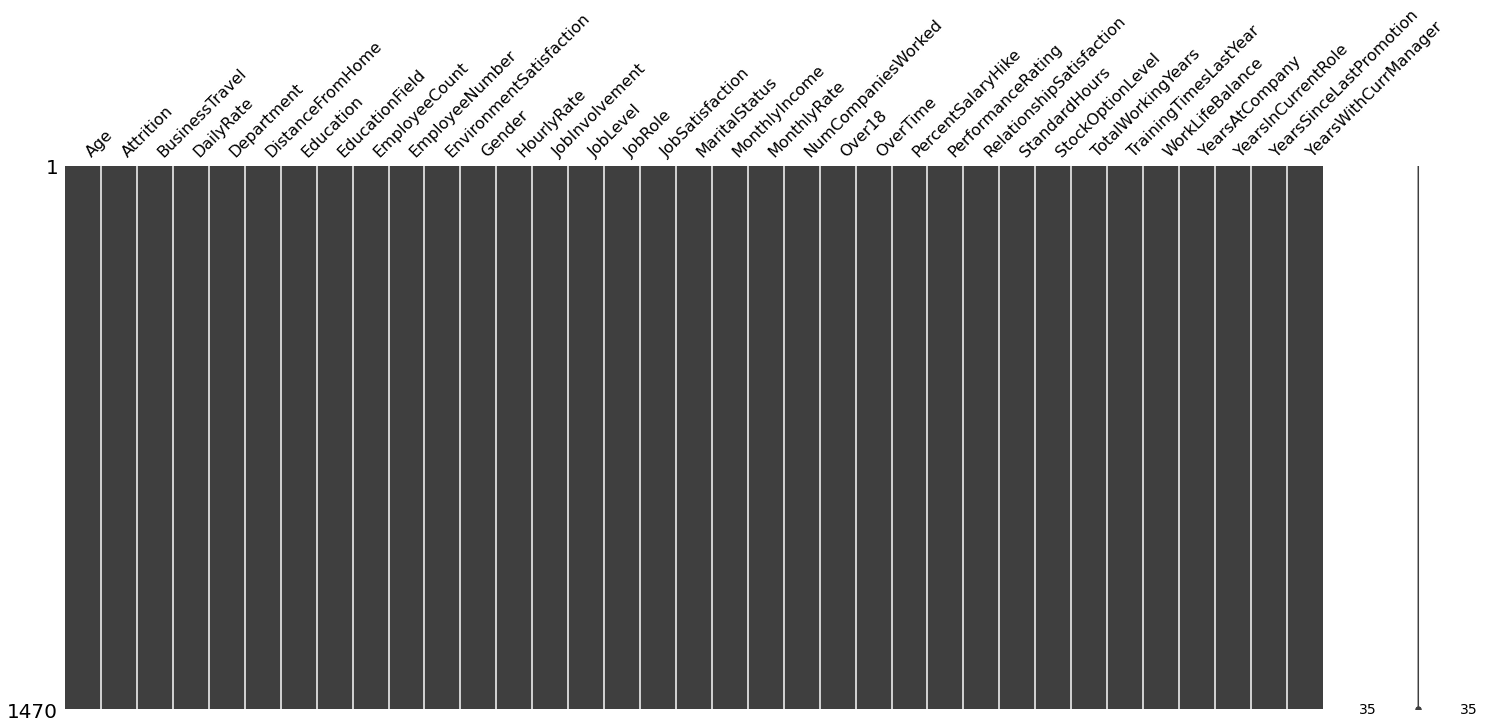

In [ ]:
msno.matrix(df) 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Finding the sum of missing value for each column

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Missing Value Imputation
### Filling the missing values of 'PercentSalaryHike' by using the mean imputation method

In [ ]:
#df['PercentSalaryHike']=df['PercentSalaryHike'].fillna(df.groupby('PerformanceRating')['PercentSalaryHike'].transform('mean'))

### Filling the missingvalues of Department by considering the respective Job Role to that department

In [ ]:

#for i in range(len(df['Department'])):
#    if df['Department'].isna()[i]==True:
#        if df['JobRole'][i]=='Healthcare Representative':
#            df['Department'][i]='Research & Development'
#        elif df['JobRole'][i]=='Human Resources':
#            df['Department'][i]='Human Resources'
#        elif df['JobRole'][i]=='Laboratory Technician':
#            df['Department'][i]='Research & Development'
#       elif df['JobRole'][i]=='Manufacturing Director':
#            df['Department'][i]='Research & Development'
#        elif df['JobRole'][i]=='Research Director':
#            df['Department'][i]='Research & Development'
#        elif df['JobRole'][i]=='Research Scientist':
#            df['Department'][i]='Research & Development'
#        elif df['JobRole'][i]=='Sales Executive':
#            df['Department'][i]='Sales'
#        elif df['JobRole'][i]=='Sales Representative':
#            df['Department'][i]='Sales'

In [ ]:
df = df.drop(['EmployeeNumber'],axis = 1)
df = df.drop(['Over18'],axis = 1)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Removing the unwanted EmployeeNumber and Over18 column

In [ ]:
df=df.drop(['EmployeeCount'],axis=1)

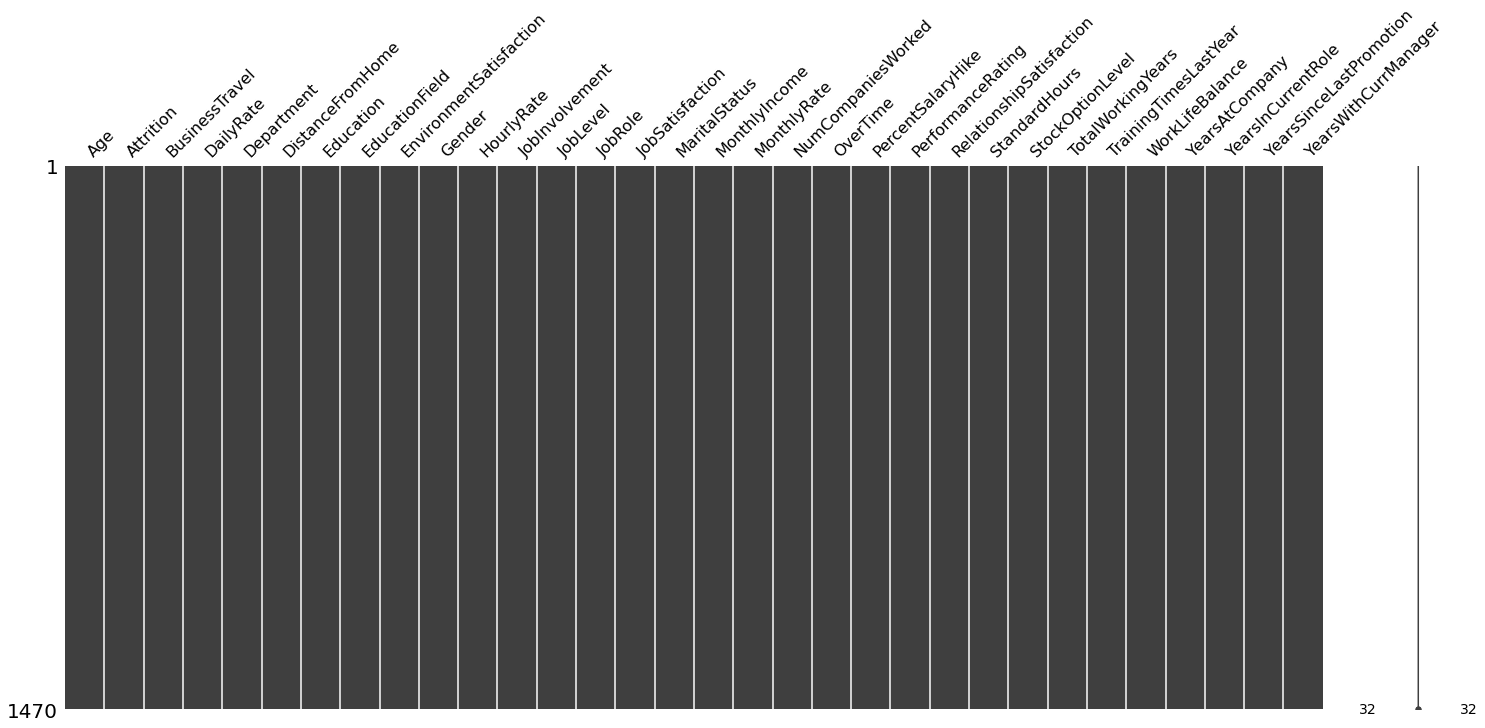

In [ ]:
msno.matrix(df) 

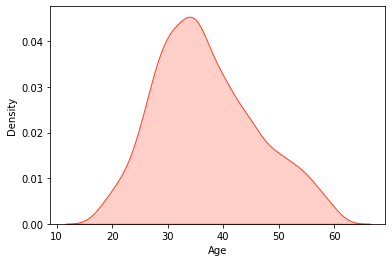

In [ ]:
sns.kdeplot(df['Age'],shade=True,color='#ff4125')

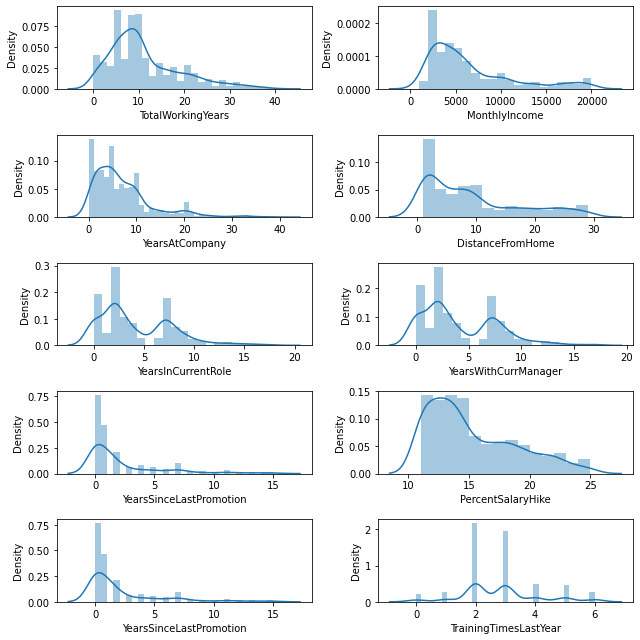

In [ ]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(5,2, figsize=(9,9))                
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(df['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(df['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(df['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(df['YearsInCurrentRole'], ax = ax[2,0]) 
sns.distplot(df['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(df['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(df['TrainingTimesLastYear'], ax = ax[4,1])
plt.tight_layout()
plt.show()

Standard scaler is used when the datapoints are having a guassian distribution i.e. most of the datapoitns lie around the mean of that feature. 

From the above graph, we can say that the datapoints of the feature may not have a gaussian distribution as the datapoints do not lie around the mean of that feature.

Thus, we will prefer to use MinMaxScaler compared to Standard Scaler.

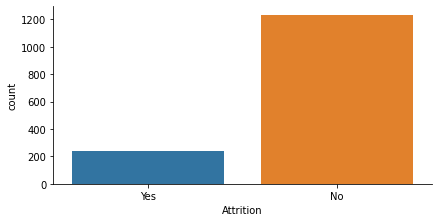

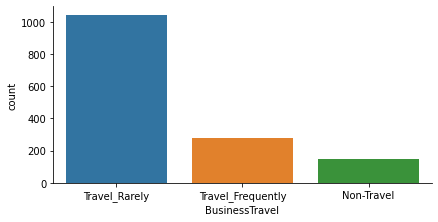

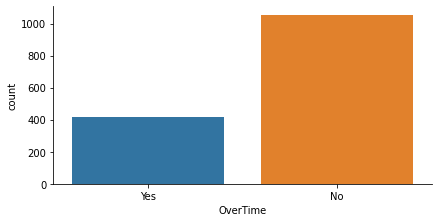

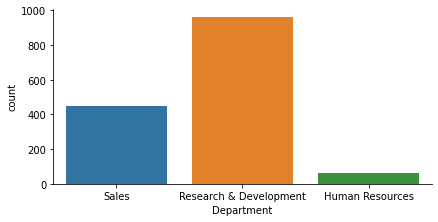

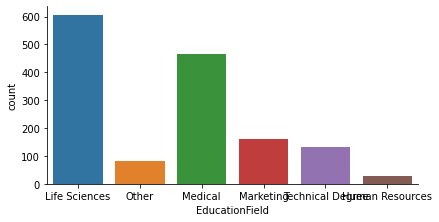

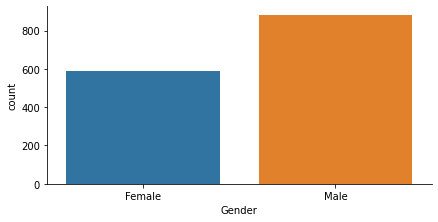

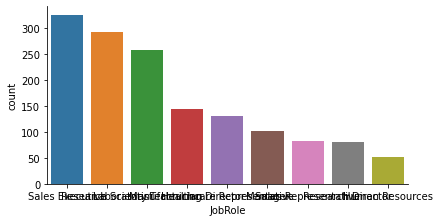

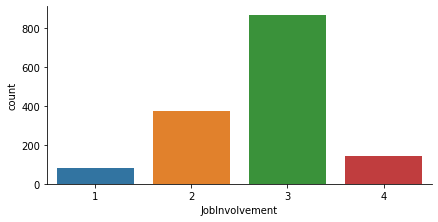

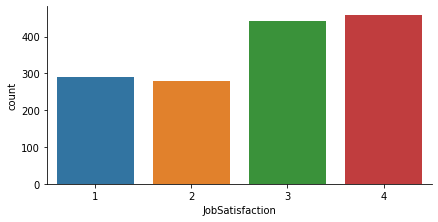

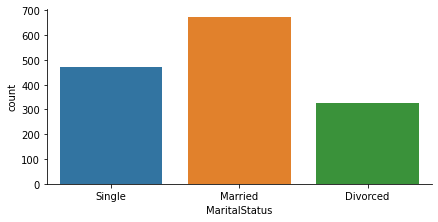

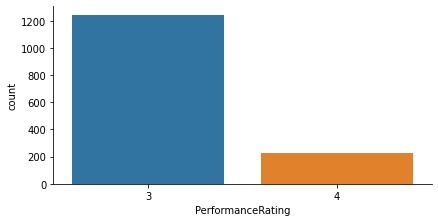

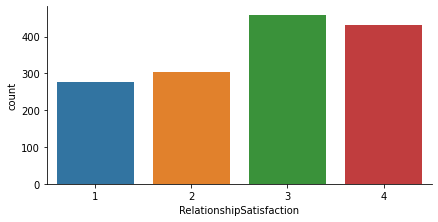

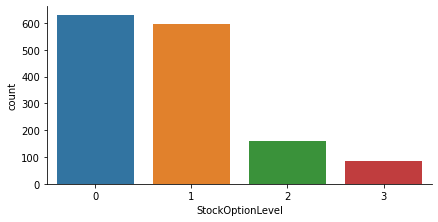

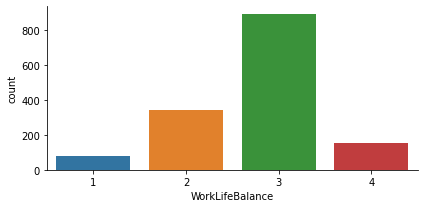

In [ ]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
               
sns.factorplot(data=df,kind='count',size=3,aspect=2,x='Attrition') 
sns.factorplot(data=df,kind='count',size=3,aspect=2,x='BusinessTravel') 
sns.factorplot(data=df,kind='count',size=3,aspect=2,x='OverTime') 
sns.factorplot(data=df,kind='count',size=3,aspect=2,x='Department') 
sns.factorplot(data=df,kind='count',size=3,aspect=2,x='EducationField')
sns.factorplot(data=df,kind='count',size=3,aspect=2,x='Gender') 
sns.factorplot(data=df,kind='count',size=3,aspect=2,x='JobRole')
sns.factorplot(data=df,kind='count',size=3,aspect=2,x='JobInvolvement')
sns.factorplot(data=df,kind='count',size=3,aspect=2,x='JobSatisfaction')
sns.factorplot(data=df,kind='count',size=3,aspect=2,x='MaritalStatus')
sns.factorplot(data=df,kind='count',size=3,aspect=2,x='PerformanceRating')
sns.factorplot(data=df,kind='count',size=3,aspect=2,x='RelationshipSatisfaction')
sns.factorplot(data=df,kind='count',size=3,aspect=2,x='StockOptionLevel')
sns.factorplot(data=df,kind='count',size=3,aspect=2,x='WorkLifeBalance')
plt.tight_layout()
plt.show()

### Making Correlation Matrix to find the relations between the variables

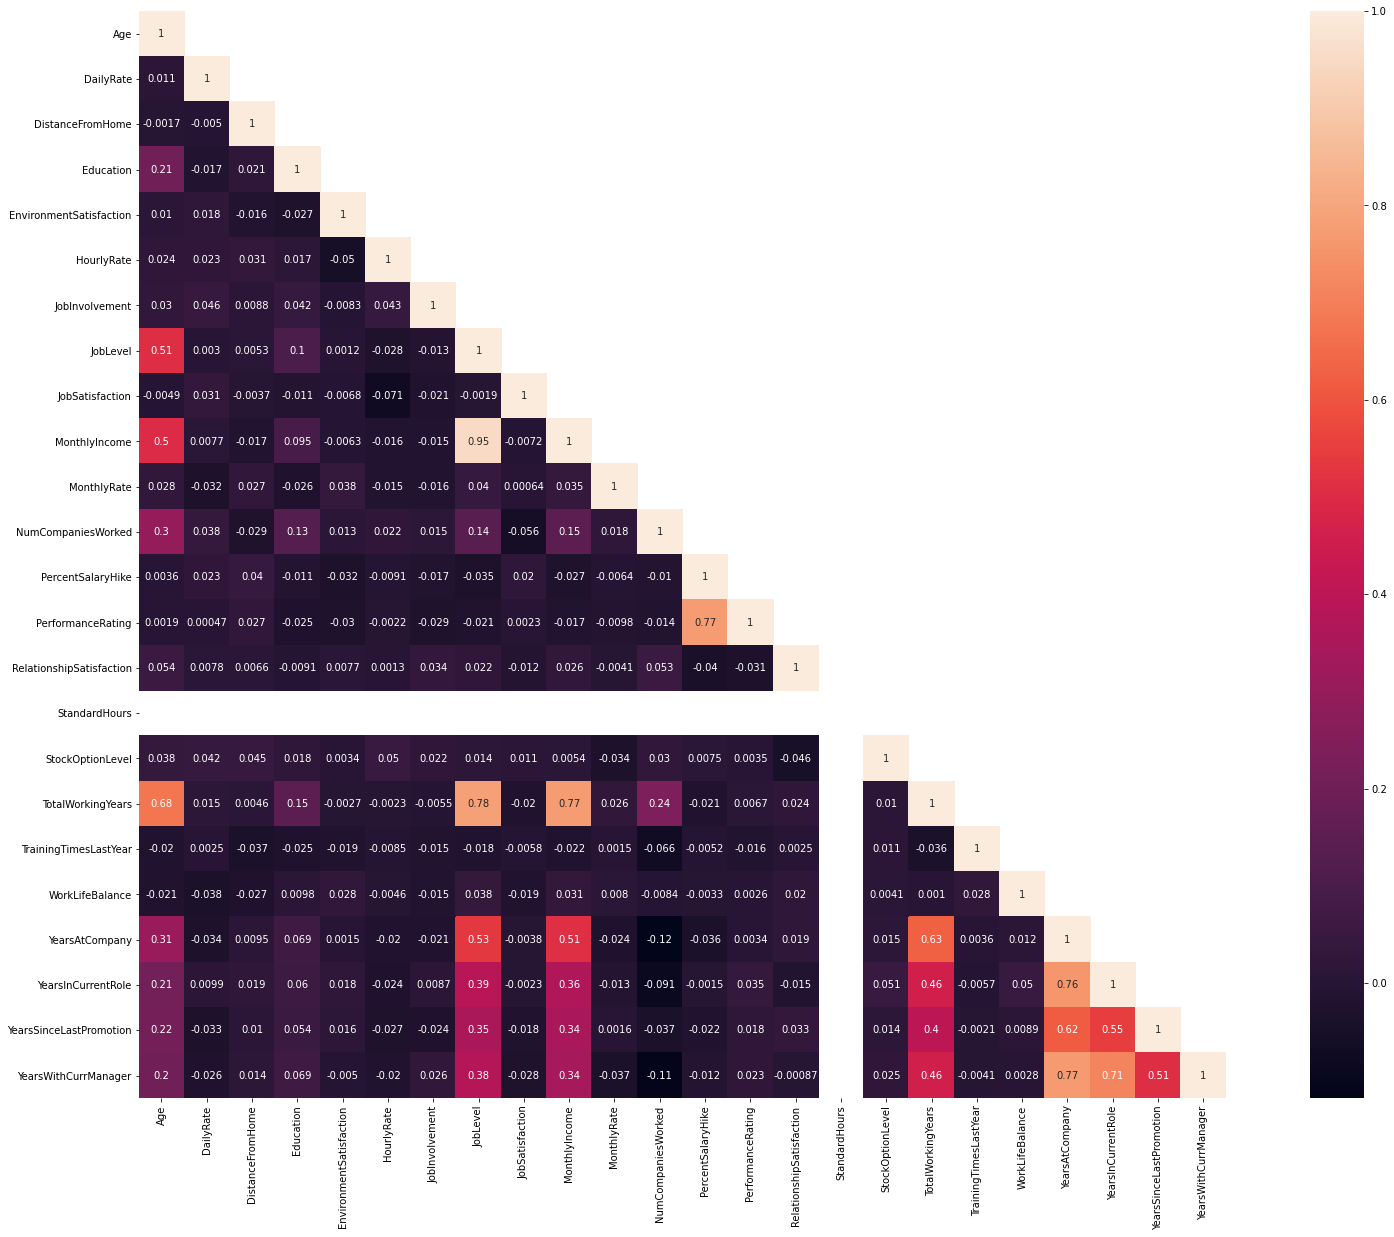

In [ ]:
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,20)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [ ]:
df=df.drop(['DailyRate', 'HourlyRate', 'MonthlyRate','JobRole'], axis = 1)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

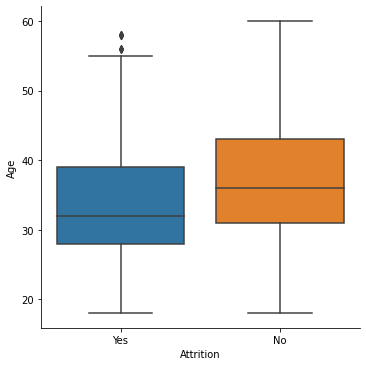

In [ ]:
sns.factorplot(data=df,y='Age',x='Attrition',size=5,aspect=1,kind='box')

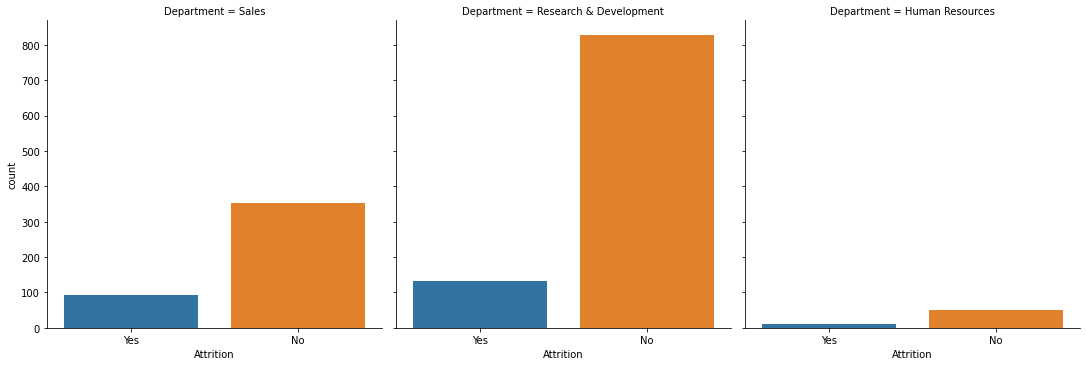

In [ ]:
sns.factorplot(data=df,kind='count',x='Attrition',col='Department')

In [ ]:
pd.crosstab(columns=[df.Attrition],index=[df.Department],margins=True,normalize='index')

Attrition,No,Yes
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278
All,0.838776,0.161224


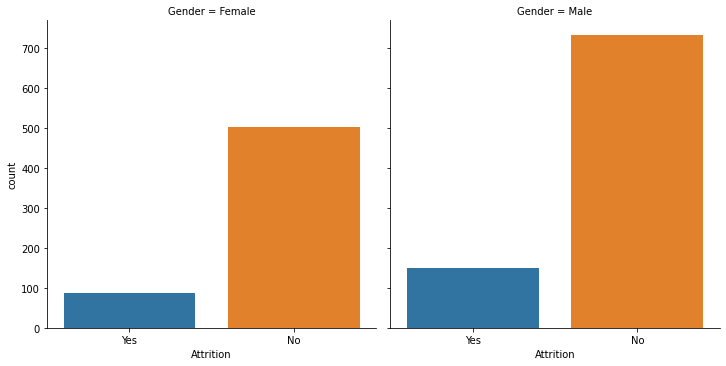

In [ ]:
sns.factorplot(data=df,kind='count',x='Attrition',col='Gender')

In [ ]:
pd.crosstab(columns=[df.Attrition],index=[df.Gender],margins=True,normalize='index')

Attrition,No,Yes
Gender,,
Female,0.852041,0.147959
Male,0.829932,0.170068
All,0.838776,0.161224


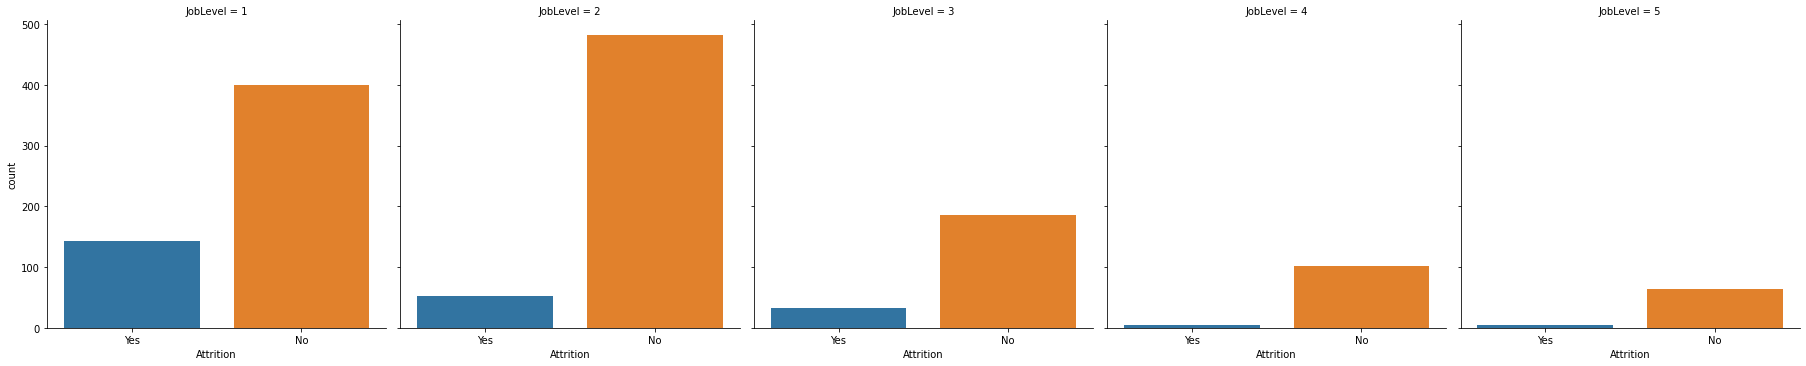

In [ ]:
sns.factorplot(data=df,kind='count',x='Attrition',col='JobLevel')

In [ ]:
pd.crosstab(columns=[df.Attrition],index=[df.JobLevel],margins=True,normalize='index')

Attrition,No,Yes
JobLevel,,
1,0.736648,0.263352
2,0.902622,0.097378
3,0.853211,0.146789
4,0.952830,0.047170
5,0.927536,0.072464
All,0.838776,0.161224


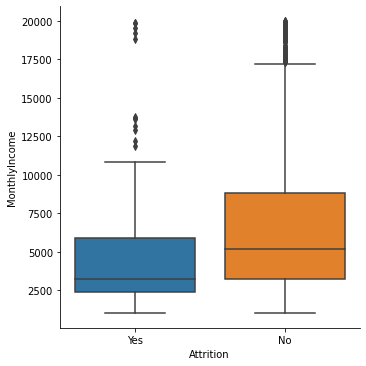

In [ ]:
sns.factorplot(data=df,y='MonthlyIncome',x='Attrition',size=5,aspect=1,kind='box')

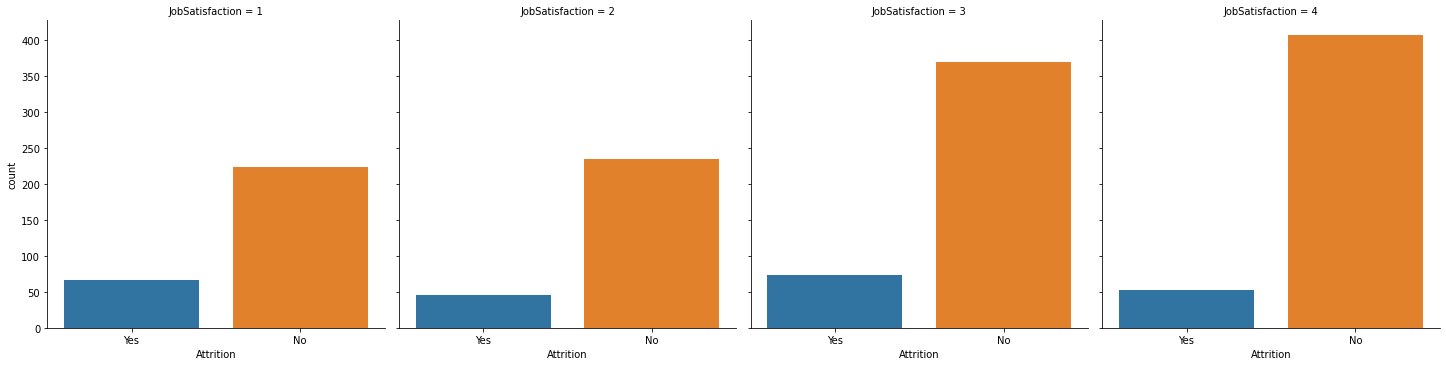

In [ ]:
sns.factorplot(data=df,kind='count',x='Attrition',col='JobSatisfaction')

In [ ]:
pd.crosstab(columns=[df.Attrition],index=[df.JobSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
JobSatisfaction,,
1,0.771626,0.228374
2,0.835714,0.164286
3,0.834842,0.165158
4,0.886710,0.113290
All,0.838776,0.161224


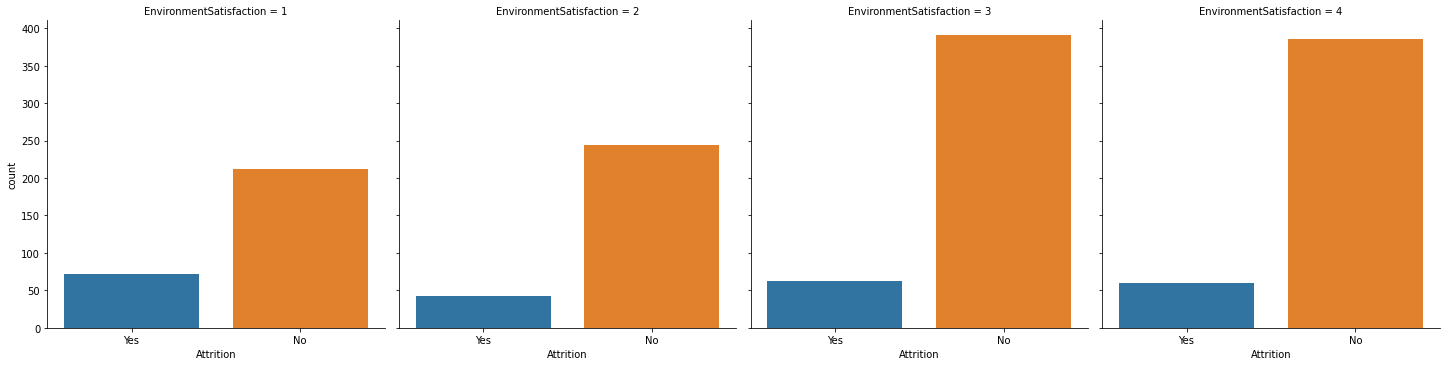

In [ ]:
sns.factorplot(data=df,kind='count',x='Attrition',col='EnvironmentSatisfaction')

In [ ]:
pd.crosstab(columns=[df.Attrition],index=[df.EnvironmentSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529
All,0.838776,0.161224


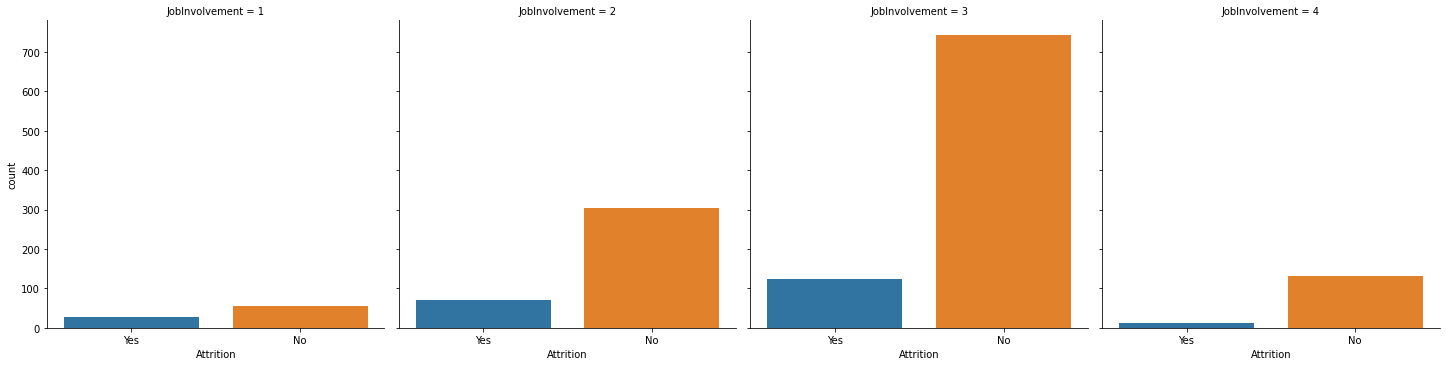

In [ ]:
sns.factorplot(data=df,kind='count',x='Attrition',col='JobInvolvement')

In [ ]:
pd.crosstab(columns=[df.Attrition],index=[df.JobInvolvement],margins=True,normalize='index')

Attrition,No,Yes
JobInvolvement,,
1,0.662651,0.337349
2,0.810667,0.189333
3,0.855991,0.144009
4,0.909722,0.090278
All,0.838776,0.161224


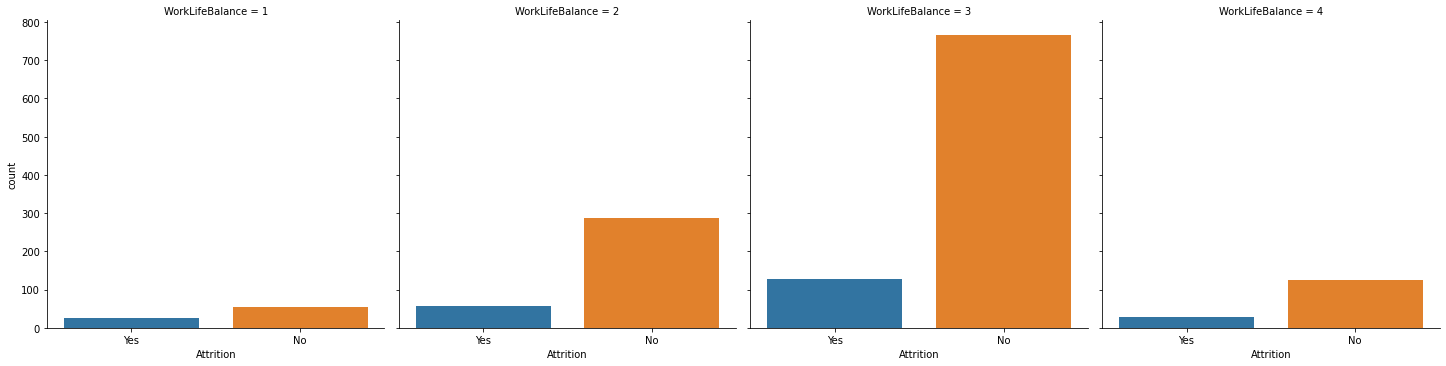

In [ ]:
sns.factorplot(data=df,kind='count',x='Attrition',col='WorkLifeBalance')

In [ ]:
pd.crosstab(columns=[df.Attrition],index=[df.WorkLifeBalance],margins=True,normalize='index')

Attrition,No,Yes
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471
All,0.838776,0.161224


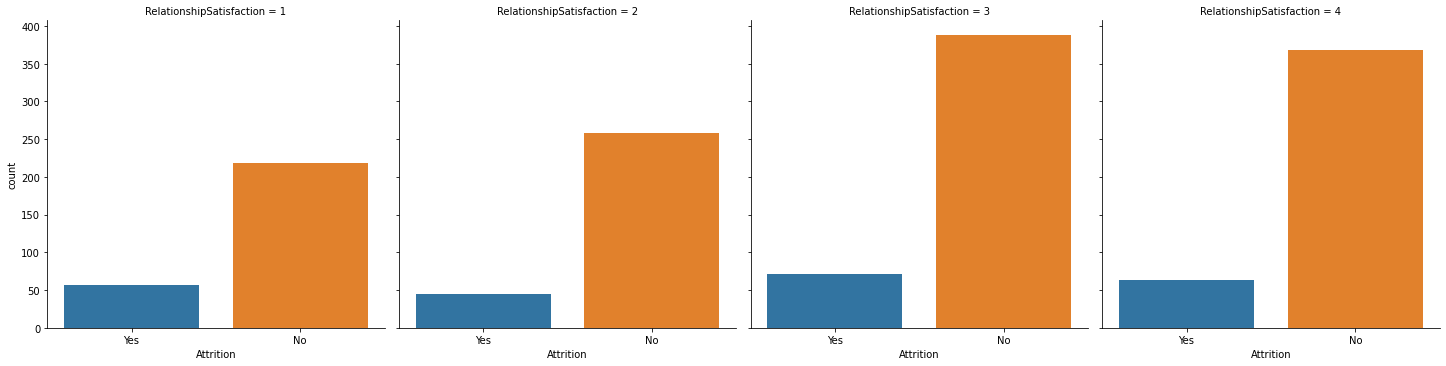

In [ ]:
sns.factorplot(data=df,kind='count',x='Attrition',col='RelationshipSatisfaction')

In [ ]:
pd.crosstab(columns=[df.Attrition],index=[df.RelationshipSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
RelationshipSatisfaction,,
1,0.793478,0.206522
2,0.851485,0.148515
3,0.845316,0.154684
4,0.851852,0.148148
All,0.838776,0.161224


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

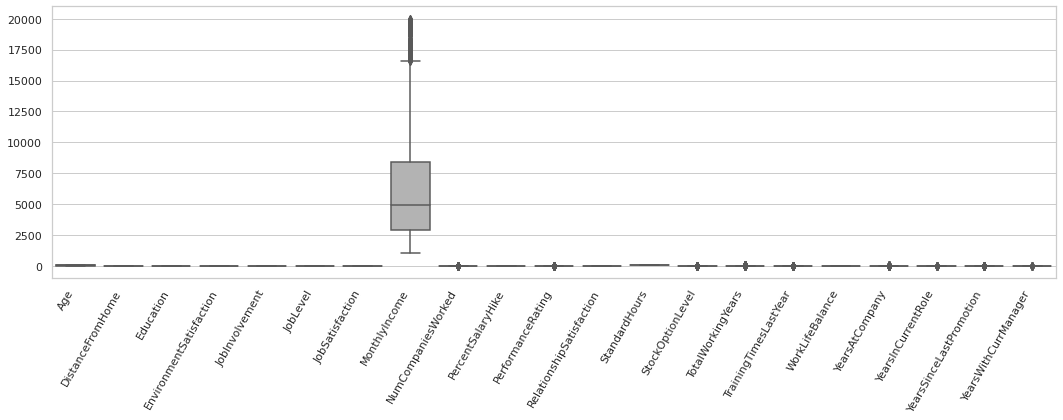

In [ ]:
plt.figure(figsize=(18,5))

sns.set(style="whitegrid")
ax = sns.boxplot(data=df, orient="v", palette="Set2")
plt.xticks(rotation=60, ha="right")

### Mapping the values to the ordinal variable

In [ ]:
df['Gender'] = df['Gender'].map({'Female':0, 'Male':1}).astype(int)
df['BusinessTravel'] = df['BusinessTravel'].map({'Travel_Rarely':2, 'Travel_Frequently':1, 'Non-Travel':0}).astype(int)

### Mapping overtime variable

In [ ]:
df['OverTime'] = df['OverTime'].map({'Yes':0, 'No':1}).astype(int)

### Using dummy variable to convert categorical variables to numerical variables

In [ ]:
dummy1 = pd.get_dummies(df['EducationField'])
dummy3 = pd.get_dummies(df['MaritalStatus'])

### Using dummy variable to convert categorical variables to numerical variables

In [ ]:
dummy4=pd.get_dummies(df['Department'])

### Joining the original dataframe and all the dummy variables produced


In [ ]:
df=pd.concat([df,dummy1,dummy3,dummy4],axis=1)

### Dropping the original variables from the dataframe

In [ ]:

df=df.drop(['EducationField','MaritalStatus','Department'],axis=1)

### Mapping Attrition variable

In [ ]:
df['Attrition'] = df['Attrition'].map({'Yes':0, 'No':1}).astype(int)

### Attrition column will be assigned to Y and all other variables are assigned to X

In [ ]:
X=df.drop(['Attrition'],axis=1)
Y=df['Attrition']

### Making Correlation Matrix to find the relations between the variables

In [ ]:
X.shape

(1470, 36)

From the shape function on X, we know that the dataframe has *1470 data points* and *48 features* that can be used to predict 'Attrition' stored in y. 

The different classification models that can be used for this task are:
- KNN Classification
- Logistic Regression
- Support Vector Machine - Linear SVC
- Support Vector Machine with Kernel trick – Rbf, Poly
- Decision Tree

But before we start applying these classification models, a three-fold split is performed on the entire dataset

Thus, we fit the above models using train and validation set and after finding the best classifier, we check for the accuracy of the best classifier using test set.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_trainval_org, X_test_org, y_trainval, y_test = train_test_split(X,Y, random_state =0,test_size=0.2)

# split train+validation set into training and validation sets
X_train_org, X_valid_org, y_train, y_valid = train_test_split(X_trainval_org, y_trainval, random_state=0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_valid = scaler.fit_transform(X_valid_org)
X_trainval = scaler.fit_transform(X_trainval_org)
X_test = scaler.transform(X_test_org)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of training set: 882   size of validation set: 294   size of test set: 294



In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
np.bincount(y_train)

array([738, 738])

In [ ]:
np.bincount(y_test)

array([ 49, 245])

From the results, it can be said that the training set has 826 data points, validation set has 276 data points and testing set has 368 data points.

Let us fit model - KNN Classifier using train and validation set and find the best parameter - *'K'* using naive grid search.

## KNN Classification



Best score: 0.72
Best parameters: {'K': 1}


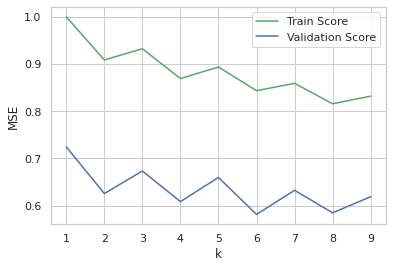

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
train_score_array = []
valid_score_array = []

best_score = 0

for k in range(1,10):
    knn_clf = KNeighborsClassifier(k)
    knn_clf.fit(X_train, y_train)
    train_score_array.append(knn_clf.score(X_train, y_train))
    score = knn_clf.score(X_valid, y_valid)
    valid_score_array.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'K': k}
            best_K = k

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, valid_score_array, c = 'b', label = 'Validation Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

The best parameter value of K for this model is 7 
which gives an accuracy of 0.92 on the validation dataset. We review this parameter using cross validation:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
knn_grid = KNeighborsClassifier(best_K)

scores = cross_val_score(knn_grid, X_trainval, y_trainval, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.8220339  0.79661017 0.79661017 0.81355932 0.78813559 0.79661017
 0.77777778 0.79487179 0.79487179 0.76923077]
Average cross-validation score: 0.80


The average cross-validation score for the parameter K = 7 is 0.90. Let us find the best parameter for this model using GridSearchCV:

Best parameters: {'n_neighbors': 10}
Best cross-validation score: 0.85


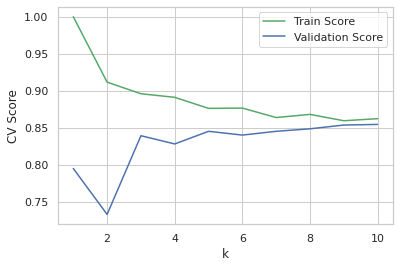

In [ ]:
k_range = list(range(1, 11))

param_grid = dict(n_neighbors=k_range)

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, return_train_score=True)

grid_search_knn.fit(X_trainval, y_trainval)

df = pd.DataFrame(grid_search_knn.cv_results_)
%matplotlib inline
x_axis = range(1,11)
plt.plot(x_axis, df.mean_train_score, c = 'g', label = 'Train Score')
plt.plot(x_axis, df.mean_test_score, c = 'b', label = 'Validation Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('CV Score')

print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))

The best parameter for this model using GridSearchCV is 7 which gives the same accuracy of 0.9 as compared to the cross validation score.

0.673469387755102
              precision    recall  f1-score   support

           0       0.30      0.71      0.42        49
           1       0.92      0.67      0.77       245

    accuracy                           0.67       294
   macro avg       0.61      0.69      0.60       294
weighted avg       0.82      0.67      0.71       294



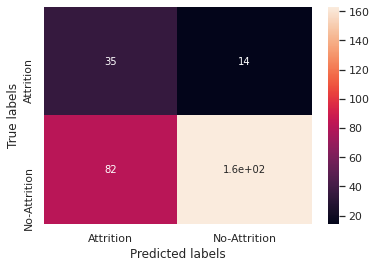

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report

pred_knn = (grid_search_knn.predict_proba(X_test)[:,1]>=0.85).astype(int)
print(metrics.accuracy_score(y_test,pred_knn))

confusion = confusion_matrix(y_test, pred_knn)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_knn))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_knn)

print ('Recall    : {}'.format(recall[0]))
print ('F1-Score    : {}'.format(fscore[0]))

Recall    : 0.7142857142857143
F1-Score    : 0.42168674698795183


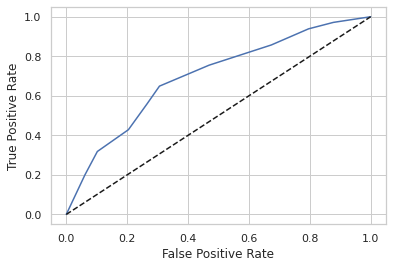

0.6974593919200333


In [ ]:
#Generating probabilities
y_pred_prob = knn_clf.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

Thus, the accuracy,recall and f1-score of this model for the best parameter - K are 0.839,0.145 and 0.234 respectively

In [ ]:
Classification_Scores={}

Classification_Scores.update({'KNN Classification':[metrics.accuracy_score(y_test,pred_knn),recall[0],fscore[0]]})

In [ ]:
columns = ['Classifier','Best Parameters','Accuracy_Score','Recall of 0']
clf_model_para = pd.DataFrame(columns=columns)

clf_model_para=clf_model_para.append({'Classifier':'KNN Classification',
                                      'Best Parameters':grid_search_knn.best_params_,
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_knn),
                                      'Recall of 0':recall[0]},ignore_index=True)

## Logistic Regression



Best score: 0.74
Best parameters: {'C': 0.1, 'penalty': 'l2'}


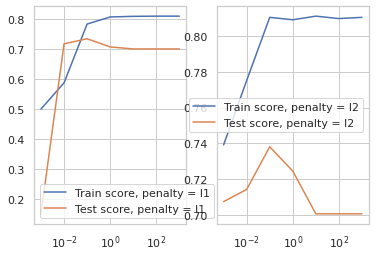

In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
valid_score_l1 = []
valid_score_l2 = []

best_score = 0
l1 = 'l1'
l2 = 'l2'

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c,solver ='liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver='lbfgs')
    
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    
    score = log_l1.score(X_valid, y_valid)
    valid_score_l1.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'C': c , 'penalty': l1}
            best_C = c
            best_Penalty = 'l1'
    
    score = log_l2.score(X_valid, y_valid)
    valid_score_l2.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'C': c , 'penalty' : l2}
            best_C = c
            best_Penalty = 'l2'
    
plt.subplot(1,2,1)
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, valid_score_l1, label = 'Test score, penalty = l1')
plt.xscale('log')
plt.legend()
plt.subplot(1,2,2)
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, valid_score_l2, label = 'Test score, penalty = l2')
plt.xscale('log')
plt.legend()

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

The best parameter value of C and Penalty for this model are 1 and `l2` respectively which gives a score of 0.88 on the validation dataset.

We review this parameter using cross validation.

In [ ]:
from sklearn.model_selection import cross_val_score
log_grid = LogisticRegression(penalty = best_Penalty, C = best_C)

scores = cross_val_score(log_grid, X_trainval, y_trainval, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.84745763 0.84745763 0.84745763 0.86440678 0.84745763 0.84745763
 0.88034188 0.84615385 0.83760684 0.85470085]
Average cross-validation score: 0.85


The average cross-validation score for the best parameters (1 and `l2`) is 0.87.

Let us find the best parameter for this model using GridSearchCV:

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'penalty': ['l1','l2'],
             'C':  [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_log = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=10, return_train_score=True)

grid_search_log.fit(X_trainval, y_trainval)

print("Best parameters: {}".format(grid_search_log.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_log.best_score_))

Best parameters: {'C': 10, 'penalty': 'l2'}
Best cross-validation score: 0.87


The best parameter for this model using GridSearchCV is `C=10` and `penalty = l2` giving average cross-validation score same as that of naive grid search.

Thus, we will choose the best parameter for Logistic Regression as `C=10` and `penalty = l2`.

0.7687074829931972
              precision    recall  f1-score   support

           0       0.40      0.80      0.53        49
           1       0.95      0.76      0.85       245

    accuracy                           0.77       294
   macro avg       0.68      0.78      0.69       294
weighted avg       0.86      0.77      0.79       294



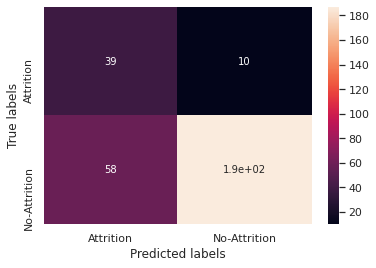

In [ ]:
import sklearn.metrics as metrics
pred_log = (grid_search_log.predict_proba(X_test)[:,1]>=0.83).astype(int)
print(metrics.accuracy_score(y_test,pred_log))

confusion = confusion_matrix(y_test, pred_log)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_log))

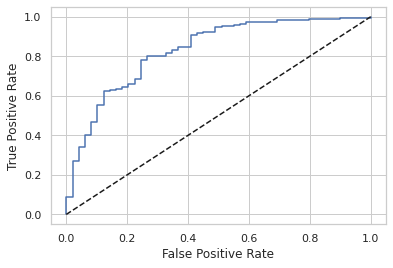

0.8299042065805913


In [ ]:
#Generating probabilities
y_pred_prob = log_l1.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_log)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.7959183673469388
F1Score    : 0.5342465753424657


Thus, the accuracy,recall and f1 score of this model for the best parameter - C=10 and penalty = l2 are 0.875,0.35 and 0.49

In [ ]:
Classification_Scores.update({'Logistic Classification':[metrics.accuracy_score(y_test,pred_log),recall[0],fscore[0]]})

In [ ]:
clf_model_para=clf_model_para.append({'Classifier':'Logistic Classification',
                                      'Best Parameters':grid_search_log.best_params_,
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_log),
                                      'Recall of 0':recall[0]},ignore_index=True)

## Support-Vector Machine

Let us apply some SVM models on this dataset.

### LinearSVC


Best score: 0.72
Best parameters: {'C': 0.001}


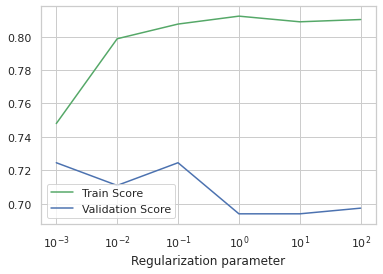

In [ ]:
from sklearn.svm import LinearSVC

train_score_list = []
valid_score_list = []

best_score = 0

for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    linear_svc = LinearSVC(C=C, max_iter=10000)
    linear_svc.fit(X_train,y_train)
    train_score_list.append(linear_svc.score(X_train,y_train))
    score = linear_svc.score(X_valid, y_valid)
    valid_score_list.append(score)
    if score > best_score:
        best_score = score
        best_parameters = {'C' : C}
        best_C = C

x_range = [0.001, 0.01, 0.1, 1, 10, 100]
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, valid_score_list, c = 'b', label = 'Validation Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('Regularization parameter')

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Using LinearSVC, we get a score of 0.89 for the regularization parameter C = 1.

Lets check the average cross-validation score for this parameter C = 1.

In [ ]:
linear_svc_grid = LinearSVC(C = best_C, max_iter=10000)
scores = cross_val_score(linear_svc_grid, X_trainval, y_trainval, cv = 10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.83898305 0.83898305 0.83898305 0.83898305 0.83898305 0.83898305
 0.84615385 0.84615385 0.83760684 0.83760684]
Average cross-validation score: 0.84


We get an average cross-validation score of 0.87 for C = 1. 

The average cross validation score using GridSearchCV is given by:

Best parameters: {'C': 1}
Best cross-validation score: 0.87


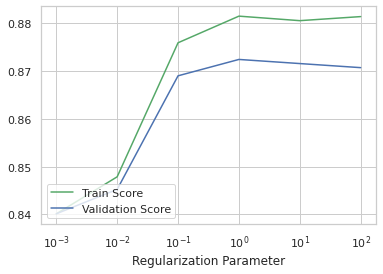

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_lsvc = GridSearchCV(LinearSVC(max_iter=10000), param_grid, cv=10, return_train_score=True)

grid_search_lsvc.fit(X_trainval, y_trainval)

df = pd.DataFrame(grid_search_lsvc.cv_results_)
%matplotlib inline
plt.plot(x_range, df.mean_train_score, c = 'g', label = 'Train Score')
plt.plot(x_range, df.mean_test_score, c = 'b', label = 'Validation Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('Regularization Parameter')

print("Best parameters: {}".format(grid_search_lsvc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lsvc.best_score_))

From the results of both the grid search methods - naive grid search and GridSearchCV, we get the same average cross-validation score of 0.87 for regularization parameter `c=1` compared to naive grid search. 

Also, from the above graph we see that for this model, with the increase in the value of regularization parameter i.e. when less regularization is done, the model has more features and performs better compared to when more regularization is done. 

0.8741496598639455
              precision    recall  f1-score   support

           0       0.75      0.37      0.49        49
           1       0.89      0.98      0.93       245

    accuracy                           0.87       294
   macro avg       0.82      0.67      0.71       294
weighted avg       0.86      0.87      0.86       294



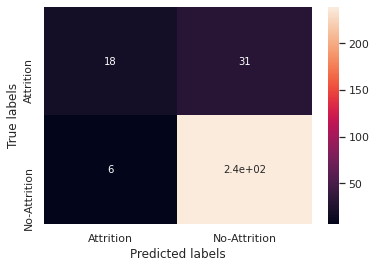

In [ ]:
pred_linear_svc = grid_search_lsvc.predict(X_test)
print(metrics.accuracy_score(y_test,pred_linear_svc))

confusion = confusion_matrix(y_test, pred_linear_svc)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_linear_svc))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_linear_svc)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.3673469387755102
F1Score    : 0.49315068493150693


Thus, the accuracy,recall and F1Score of this model for the best parameter - C=1 are 0.8722,0.34 and 0.47 respectively

In [ ]:
Classification_Scores.update({'Linear_SVC':[metrics.accuracy_score(y_test,pred_linear_svc),recall[0],fscore[0]]})

In [ ]:
clf_model_para=clf_model_para.append({'Classifier':'Linear_SVC',
                                      'Best Parameters':grid_search_lsvc.best_params_,
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_linear_svc),
                                      'Recall of 0':recall[0]},ignore_index=True)

### SVC - rbf

The hyper-parameters for this model are `gamma` and regularlization term `C`.

In [ ]:
from sklearn.svm import SVC

train_score_list = []
valid_score_list = []

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svc_rbf = SVC(kernel='rbf', gamma=gamma, C=C, probability=True)
        svc_rbf.fit(X_train,y_train)
        train_score_list.append(svc_rbf.score(X_train,y_train))
        score = svc_rbf.score(X_valid, y_valid)
        valid_score_list.append(score)
        if score > best_score:
            best_score = score
            best_parameters = {'gamma': gamma , 'C' : C}
            best_Gamma = gamma
            best_C = C

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.85
Best parameters: {'gamma': 10, 'C': 0.001}


The best paramaters for this kernel are `gamma = 0.01` and `C = 100` which gives a score of 0.87 on the validation set.
The average cross-validation score for these parameters is:

In [ ]:
svc_rbf_grid = SVC(kernel='rbf', gamma = best_Gamma, C = best_C)

scores = cross_val_score(svc_rbf_grid, X_trainval, y_trainval, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.83898305 0.83898305 0.83898305 0.83898305 0.83898305 0.83898305
 0.84615385 0.84615385 0.83760684 0.83760684]
Average cross-validation score: 0.84


From the results of both the grid search methods - we got the average cross validation score is 0.88. 

Let us check for the average cross-validation score using GridSearchCV.

In [ ]:
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_svcr = GridSearchCV(SVC(kernel='rbf',probability=True), param_grid, cv=10, return_train_score=True)

grid_search_svcr.fit(X_trainval, y_trainval)

print("Best parameters: {}".format(grid_search_svcr.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_svcr.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.87


The best parameters that we got from GridSearchCV are C = 100 and gamma = 0.1. Compared to the best parameters we got from naive grid search (C = 100 and gamma = 0.01), the average cross-validation score increased from 0.87 to 0.88.

Thus the best parameters for this model are `C = 100` and `gamma = 0.1`. 

0.7993197278911565
              precision    recall  f1-score   support

           0       0.44      0.69      0.54        49
           1       0.93      0.82      0.87       245

    accuracy                           0.80       294
   macro avg       0.68      0.76      0.70       294
weighted avg       0.85      0.80      0.82       294



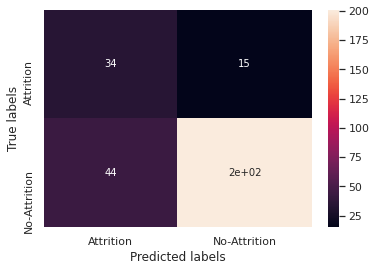

In [ ]:
pred_rbf = (grid_search_svcr.predict_proba(X_test)[:,1]>=0.81).astype(int)
print(metrics.accuracy_score(y_test,pred_rbf))

confusion = confusion_matrix(y_test, pred_rbf)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_rbf))

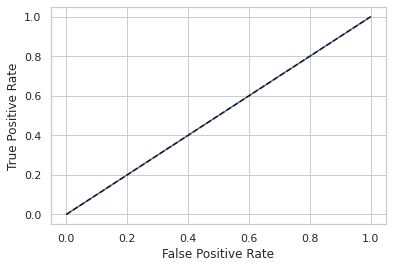

0.5


In [ ]:
#Generating probabilities
y_pred_prob = svc_rbf.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_rbf)

print ('Recall    : {}'.format(recall[0]))
print ('F1-Score    : {}'.format(fscore[0]))

Recall    : 0.6938775510204082
F1-Score    : 0.5354330708661417


Thus, the accuracy,recall and f1-score of this model for the best parameter - C=100 and gamma = 0.1 are 0.877,0.34 and 0.48  respectively.

In [ ]:
Classification_Scores.update({'SVC RBF Kernel':[metrics.accuracy_score(y_test,pred_rbf),recall[0],fscore[0]]})

In [ ]:
clf_model_para=clf_model_para.append({'Classifier':'SVC RBF Kernel',
                                      'Best Parameters':grid_search_svcr.best_params_,
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_rbf),
                                      'Recall of 0':recall[0]},ignore_index=True)

### SVC - Poly



In [ ]:
train_score_list = []
valid_score_list = []

best_score = 0

for degree in range(1,5):
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
            svc_poly = SVC(kernel='poly', degree = degree, C=C, gamma = gamma,probability=True)
            svc_poly.fit(X_train,y_train)
            train_score_list.append(svc_poly.score(X_train,y_train))
            score = svc_poly.score(X_valid, y_valid)
            valid_score_list.append(score)
            if score > best_score:
                best_score = score
                best_parameters = {'degree': degree , 'C' : C, 'gamma' : gamma}
                best_Degree = degree
                best_C = C
                best_gamma = gamma

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.80
Best parameters: {'degree': 3, 'C': 0.1, 'gamma': 1}


The best paramaters for this kernel are `degree = 1`, `gamma = 100` and `C = 0.01` which gives a score of 0.87 on the validation set.
The average cross-validation score for these parameters is:

In [ ]:
svc_poly_grid = SVC(kernel='poly',degree = best_Degree, C=best_C, gamma = best_Gamma)

scores = cross_val_score(svc_poly_grid, X_trainval, y_trainval, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.8559322  0.74576271 0.77966102 0.78813559 0.74576271 0.79661017
 0.84615385 0.84615385 0.78632479 0.76068376]
Average cross-validation score: 0.80


The average cross-validation score for the best parameters is 0.84.

Let's check for the best parameter using GridSearchCV:

In [ ]:
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'degree': [1,2,3,4,5]}

grid_search_svcp = GridSearchCV(SVC(kernel='poly',probability=True), param_grid, cv=10, return_train_score=True)

grid_search_svcp.fit(X_trainval, y_trainval)

print("Best parameters: {}".format(grid_search_svcp.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_svcp.best_score_))

Best parameters: {'C': 10, 'degree': 1, 'gamma': 100}
Best cross-validation score: 0.88


The best parameters that we got from GridSearchCV are degree = 1, C = 1 and gamma = 100.

Compared to the best parameters we got from naive grid search (degree = 1, C = 1 and gamma = 100), the average cross-validation score increased from 0.87 to 0.88.

Thus the best parameters for this model are degree = 1, C = 1 and gamma = 100. 

0.7482993197278912
              precision    recall  f1-score   support

           0       0.38      0.84      0.53        49
           1       0.96      0.73      0.83       245

    accuracy                           0.75       294
   macro avg       0.67      0.78      0.68       294
weighted avg       0.86      0.75      0.78       294



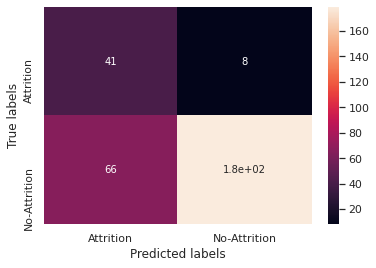

In [ ]:
pred_poly = (grid_search_svcp.predict_proba(X_test)[:,1]>=0.84).astype(int)
print(metrics.accuracy_score(y_test,pred_poly))

confusion = confusion_matrix(y_test, pred_poly)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_poly))

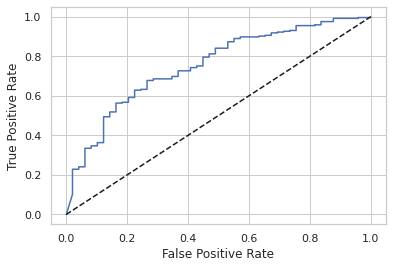

0.7536443148688047


In [ ]:
#Generating probabilities
y_pred_prob = svc_poly.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_poly)

print ('Recall    : {}'.format(recall[0]))
print ('FScore    : {}'.format(fscore[0]))

Recall    : 0.8367346938775511
FScore    : 0.5256410256410257


Thus, the accuracy,recall and f1score of this model for the best parameter - degree = 1, C = 1 and gamma = 100 are 0.88,0.37 and 0.51 respectively.

In [ ]:
Classification_Scores.update({'SVC Poly Kernel':[metrics.accuracy_score(y_test,pred_poly),recall[0],fscore[0]]})

In [ ]:
clf_model_para=clf_model_para.append({'Classifier':'SVC Poly Kernel',
                                      'Best Parameters':grid_search_svcp.best_params_,
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_poly),
                                      'Recall of 0':recall[0]},ignore_index=True)

### SVC-linear

In [ ]:
from sklearn.svm import SVC
train_score_list = []
valid_score_list = []

best_score = 0

for degree in range(1,5):
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
            svc_poly = SVC(kernel='linear', degree = degree, C=C, gamma = gamma,probability=True)
            svc_poly.fit(X_train,y_train)
            train_score_list.append(svc_poly.score(X_train,y_train))
            score = svc_poly.score(X_valid, y_valid)
            valid_score_list.append(score)
            if score > best_score:
                best_score = score
                best_parameters = {'degree': degree , 'C' : C, 'gamma' : gamma}
                best_Degree = degree
                best_C = C
                best_gamma = gamma

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.75
Best parameters: {'degree': 1, 'C': 1, 'gamma': 0.001}


The best paramaters for this kernel are `degree = 1`, `gamma = 0.001` and `C = 1` which gives a score of 0.87 on the validation set.
The average cross-validation score for these parameters is:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

svc_poly_grid = SVC(kernel='linear',degree = best_Degree, C=best_C, gamma = best_gamma)

scores = cross_val_score(svc_poly_grid, X_trainval, y_trainval, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.87288136 0.88135593 0.86440678 0.87288136 0.84745763 0.88135593
 0.88034188 0.85470085 0.84615385 0.88034188]
Average cross-validation score: 0.87


The average cross-validation score for the best parameters is 0.88.

Let's check for the best parameter using GridSearchCV:

In [ ]:
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'degree': [1,2,3,4,5]}

grid_search_svcl = GridSearchCV(SVC(kernel='linear',probability=True), param_grid, cv=10, return_train_score=True)

grid_search_svcl.fit(X_trainval, y_trainval)

print("Best parameters: {}".format(grid_search_svcl.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_svcl.best_score_))

Best parameters: {'C': 10, 'degree': 1, 'gamma': 0.001}
Best cross-validation score: 0.87


The best parameters that we got from GridSearchCV are degree = 1, C = 100 and gamma = 0.001.

Compared to the best parameters we got from naive grid search (degree = 1, C = 100 and gamma = 0.001), the average cross-validation score increased from 0.87 to 0.88.

Thus the best parameters for this model are degree = 1, C = 100 and gamma = 0.001. 

0.7585034013605442
              precision    recall  f1-score   support

           0       0.39      0.84      0.54        49
           1       0.96      0.74      0.84       245

    accuracy                           0.76       294
   macro avg       0.68      0.79      0.69       294
weighted avg       0.86      0.76      0.79       294



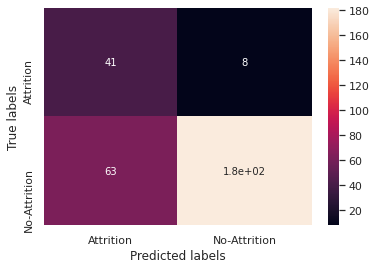

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_linear = (grid_search_svcl.predict_proba(X_test)[:,1]>=0.84).astype(int)
print(metrics.accuracy_score(y_test,pred_linear))

confusion = confusion_matrix(y_test, pred_linear)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_linear))

Thus, the accuracy,recall and f1score of this model for the best parameter - degree = 1, C = 1 and gamma = 100 are 0.88,0.37 and 0.51 respectively.

In [ ]:
Classification_Scores.update({'SVM Poly Linear':scores.mean()})

In [ ]:
clf_model_para = clf_model_para.append({'Regressor':'SVM Linear',
                       'Average Cross Validation Score':scores.mean(),
                       'Best Parameters':best_parameters},ignore_index=True)

### Decision Tree



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_trainval, y_trainval)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_trainval, y_trainval)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.769


We are getting an accuracy of 1.00 on the training set as it goes till highest depth. We are getting an accuracy of 0.774 on the testing set.

Let us check for the average cross-validation score for this model using cross_val_score. 

In [ ]:
dtree_cv = DecisionTreeClassifier()
scores = cross_val_score(dtree_cv, X_trainval, y_trainval, cv = 10, scoring = 'accuracy' )
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.84745763 0.76271186 0.75423729 0.81355932 0.79661017 0.77966102
 0.81196581 0.78632479 0.79487179 0.76068376]
Average cross-validation score: 0.79


In [ ]:
param_grid = {'criterion': ['gini','entropy'],
             'max_depth': [1,2,3,4,5,6,7,8,9,10],
             'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}

grid_search_dtree = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=10, return_train_score=True)

grid_search_dtree.fit(X_trainval, y_trainval)

print("Best parameters: {}".format(grid_search_dtree.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_dtree.best_score_))

Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 3}
Best cross-validation score: 0.84


0.8401360544217688
              precision    recall  f1-score   support

           0       0.57      0.16      0.25        49
           1       0.85      0.98      0.91       245

    accuracy                           0.84       294
   macro avg       0.71      0.57      0.58       294
weighted avg       0.81      0.84      0.80       294



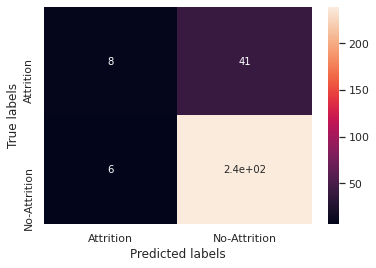

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_tree = grid_search_dtree.predict(X_test)
print(metrics.accuracy_score(y_test,pred_tree))

confusion = confusion_matrix(y_test, pred_tree)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_tree))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_tree)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.16326530612244897
F1Score    : 0.25396825396825395


Thus, the accuracy,recall and f1 score of this model are 0.774,0.274 and 0.291 respectively.

In [ ]:
Classification_Scores.update({'Decison Tree':[metrics.accuracy_score(y_test,pred_tree),recall[0],fscore[0]]})

In [ ]:
clf_model_para=clf_model_para.append({'Classifier':'Decision Tree',
                                      'Best Parameters':' ',
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_tree),
                                      'Recall of 0':recall[0]},ignore_index=True)

# Project Part 2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

### Hard Voting Classifier

In [ ]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
hardvoting_clf = VotingClassifier(estimators=[('lr', grid_search_log), ('knn', grid_search_knn), ('svc', grid_search_svcr)], voting='hard')
hardvoting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (grid_search_log, grid_search_knn, grid_search_svcr, hardvoting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

GridSearchCV 0.7585034013605442
GridSearchCV 0.7585034013605442
GridSearchCV 0.8333333333333334
VotingClassifier 0.8333333333333334


0.8333333333333334
              precision    recall  f1-score   support

           0       0.50      0.35      0.41        49
           1       0.88      0.93      0.90       245

    accuracy                           0.83       294
   macro avg       0.69      0.64      0.66       294
weighted avg       0.81      0.83      0.82       294



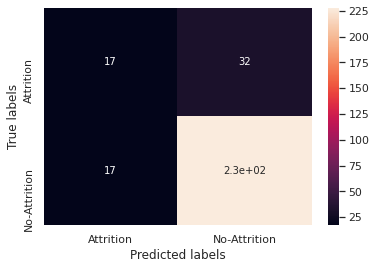

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_hardvotingclf = hardvoting_clf.predict(X_test)
print(metrics.accuracy_score(y_test,pred_hardvotingclf))

confusion = confusion_matrix(y_test, pred_hardvotingclf)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_hardvotingclf))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_hardvotingclf)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.3469387755102041
F1Score    : 0.4096385542168675


In [ ]:
Classification_Scores.update({'Hard-Voting Classifier':[metrics.accuracy_score(y_test,pred_hardvotingclf),recall[0],fscore[0]]})

### Soft Voting Classifier

In [ ]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
softvoting_clf = VotingClassifier(estimators=[('lr', grid_search_log), ('knn', grid_search_knn), ('dtree',grid_search_dtree)], voting='soft')
softvoting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (grid_search_log, grid_search_knn, grid_search_dtree, softvoting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

GridSearchCV 0.7585034013605442
GridSearchCV 0.7585034013605442
GridSearchCV 0.7619047619047619
VotingClassifier 0.8027210884353742


0.8027210884353742
              precision    recall  f1-score   support

           0       0.42      0.49      0.45        49
           1       0.89      0.87      0.88       245

    accuracy                           0.80       294
   macro avg       0.66      0.68      0.67       294
weighted avg       0.82      0.80      0.81       294



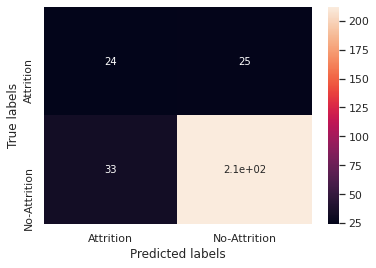

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_softvotingclf = softvoting_clf.predict(X_test)
print(metrics.accuracy_score(y_test,pred_softvotingclf))

confusion = confusion_matrix(y_test, pred_softvotingclf)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_softvotingclf))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_softvotingclf)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.4897959183673469
F1Score    : 0.45283018867924524


In [ ]:
Classification_Scores.update({'Soft-Voting Classifier':[metrics.accuracy_score(y_test,pred_softvotingclf),recall[0],fscore[0]]})

### Bagging on Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(),bootstrap=True,n_jobs=-1,random_state=0,max_features=0.5,n_estimators=500,max_samples=0.6)

bag_clf.fit(X_trainval, y_trainval)
print("Accuracy on training set: {:.3f}".format(bag_clf.score(X_trainval, y_trainval)))
print("Accuracy on test set: {:.3f}".format(bag_clf.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.850


In [ ]:
scores = cross_val_score(bag_clf, X_trainval, y_trainval, cv = 10, scoring = 'accuracy' )
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.87288136 0.87288136 0.83898305 0.87288136 0.83898305 0.84745763
 0.88034188 0.85470085 0.86324786 0.85470085]
Average cross-validation score: 0.86


In [ ]:
param_grid = {'max_samples': [0.5,0.6,0.8],
             'max_features': [0.4,0.5,0.6],
             'n_estimators': [100,300,500]}

grid_search_bagclf = GridSearchCV(BaggingClassifier(random_state=0,bootstrap=True,n_jobs=-1), param_grid, cv=10, return_train_score=True)

grid_search_bagclf.fit(X_trainval, y_trainval)

print("Best parameters: {}".format(grid_search_bagclf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_bagclf.best_score_))

Best parameters: {'max_features': 0.5, 'max_samples': 0.8, 'n_estimators': 100}
Best cross-validation score: 0.86


0.8469387755102041
              precision    recall  f1-score   support

           0       0.67      0.16      0.26        49
           1       0.85      0.98      0.91       245

    accuracy                           0.85       294
   macro avg       0.76      0.57      0.59       294
weighted avg       0.82      0.85      0.81       294



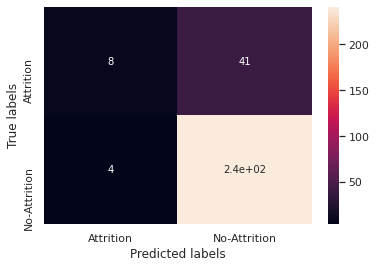

In [ ]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_bagclf = grid_search_bagclf.predict(X_test)
print(metrics.accuracy_score(y_test,pred_bagclf))

confusion = confusion_matrix(y_test, pred_bagclf)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_bagclf))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_bagclf)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.16326530612244897
F1Score    : 0.2622950819672131


In [ ]:
Classification_Scores.update({'Bagging on Decision Tree':[metrics.accuracy_score(y_test,pred_bagclf),recall[0],fscore[0]]})

### Pasting on Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

paste_clf = BaggingClassifier(DecisionTreeClassifier(),bootstrap=False,n_jobs=-1,random_state=0,max_features=0.6,n_estimators=450,max_samples=0.5)

paste_clf.fit(X_trainval, y_trainval)
print("Accuracy on training set: {:.3f}".format(paste_clf.score(X_trainval, y_trainval)))
print("Accuracy on test set: {:.3f}".format(paste_clf.score(X_test, y_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.850


In [ ]:
scores = cross_val_score(paste_clf, X_trainval, y_trainval, cv = 10, scoring = 'accuracy' )
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.88983051 0.87288136 0.8559322  0.87288136 0.8559322  0.8559322
 0.88034188 0.85470085 0.86324786 0.84615385]
Average cross-validation score: 0.86


In [ ]:
param_grid = {'max_samples': [0.4,0.5,0.6],
             'max_features': [0.4,0.5,0.6],
             'n_estimators': [300,400,500]}

grid_search_pasteclf = GridSearchCV(BaggingClassifier(random_state=0,bootstrap=False,n_jobs=-1), param_grid, cv=10, return_train_score=True)

grid_search_pasteclf.fit(X_trainval, y_trainval)

print("Best parameters: {}".format(grid_search_pasteclf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_pasteclf.best_score_))

Best parameters: {'max_features': 0.6, 'max_samples': 0.4, 'n_estimators': 500}
Best cross-validation score: 0.87


0.8401360544217688
              precision    recall  f1-score   support

           0       0.58      0.14      0.23        49
           1       0.85      0.98      0.91       245

    accuracy                           0.84       294
   macro avg       0.72      0.56      0.57       294
weighted avg       0.81      0.84      0.80       294



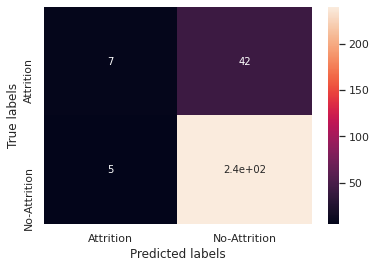

In [ ]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_pasteclf = grid_search_pasteclf.predict(X_test)
print(metrics.accuracy_score(y_test,pred_pasteclf))

confusion = confusion_matrix(y_test, pred_pasteclf)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_pasteclf))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_pasteclf)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.14285714285714285
F1Score    : 0.22950819672131142


In [ ]:
Classification_Scores.update({'Pasting on Decision Tree':[metrics.accuracy_score(y_test,pred_pasteclf),recall[0],fscore[0]]})

### Bagging on K Nearest Neighbors

In [ ]:
from sklearn.ensemble import BaggingClassifier

bagknn_clf = BaggingClassifier(KNeighborsClassifier(), bootstrap=True, n_jobs=-1, random_state=0)

bagknn_clf.fit(X_trainval, y_trainval)
print("Accuracy on training set: {:.3f}".format(bagknn_clf.score(X_trainval, y_trainval)))
print("Accuracy on test set: {:.3f}".format(bagknn_clf.score(X_test, y_test)))

Accuracy on training set: 0.879
Accuracy on test set: 0.844


In [ ]:
scores = cross_val_score(bagknn_clf, X_trainval, y_trainval, cv = 10, scoring = 'accuracy' )
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.8559322  0.84745763 0.8220339  0.84745763 0.86440678 0.84745763
 0.87179487 0.83760684 0.82051282 0.8034188 ]
Average cross-validation score: 0.84


In [ ]:
param_grid = {'max_samples': [0.5,0.6],
             'max_features': [0.4,0.5],
             'n_estimators': [100,500]}

grid_search_bagclf = GridSearchCV(BaggingClassifier(KNeighborsClassifier(),random_state=0,bootstrap=True,n_jobs=-1), param_grid, cv=10, return_train_score=True)

grid_search_bagclf.fit(X_trainval, y_trainval)

print("Best parameters: {}".format(grid_search_bagclf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_bagclf.best_score_))

Best parameters: {'max_features': 0.4, 'max_samples': 0.5, 'n_estimators': 100}
Best cross-validation score: 0.84


0.8333333333333334
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.83      1.00      0.91       245

    accuracy                           0.83       294
   macro avg       0.42      0.50      0.45       294
weighted avg       0.69      0.83      0.76       294



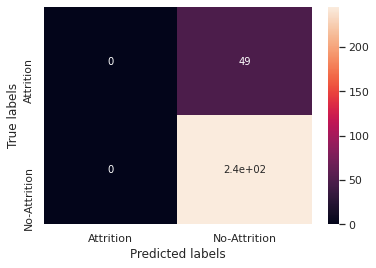

In [ ]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_bagknn_clf = grid_search_bagclf.predict(X_test)
print(metrics.accuracy_score(y_test,pred_bagknn_clf))

confusion = confusion_matrix(y_test, pred_bagknn_clf)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_bagknn_clf))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_bagknn_clf)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.0
F1Score    : 0.0


In [ ]:
Classification_Scores.update({'Bagging on K Nearest Neighbors':[metrics.accuracy_score(y_test,pred_bagclf),recall[0],fscore[0]]})

### Pasting on K Nearest Neighbors

In [ ]:
from sklearn.ensemble import BaggingClassifier

pasteknn_clf = BaggingClassifier(KNeighborsClassifier(), bootstrap=False, n_jobs=-1, random_state=0)

pasteknn_clf.fit(X_trainval, y_trainval)
print("Accuracy on training set: {:.3f}".format(bagknn_clf.score(X_trainval, y_trainval)))
print("Accuracy on test set: {:.3f}".format(bagknn_clf.score(X_test, y_test)))

Accuracy on training set: 0.879
Accuracy on test set: 0.844


In [ ]:
scores = cross_val_score(bagknn_clf, X_trainval, y_trainval, cv = 10, scoring = 'accuracy' )
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.8559322  0.84745763 0.8220339  0.84745763 0.86440678 0.84745763
 0.87179487 0.83760684 0.82051282 0.8034188 ]
Average cross-validation score: 0.84


In [ ]:
param_grid = {'max_samples': [0.5,0.6],
             'max_features': [0.4,0.5],
             'n_estimators': [100,500]}

grid_search_pasteknnclf = GridSearchCV(BaggingClassifier(KNeighborsClassifier(),random_state=0,bootstrap=False,n_jobs=-1), param_grid, cv=10, return_train_score=True)

grid_search_pasteknnclf.fit(X_trainval, y_trainval)

print("Best parameters: {}".format(grid_search_pasteknnclf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_pasteknnclf.best_score_))

Best parameters: {'max_features': 0.4, 'max_samples': 0.5, 'n_estimators': 500}
Best cross-validation score: 0.84


0.8469387755102041
              precision    recall  f1-score   support

           0       0.75      0.12      0.21        49
           1       0.85      0.99      0.92       245

    accuracy                           0.85       294
   macro avg       0.80      0.56      0.56       294
weighted avg       0.83      0.85      0.80       294



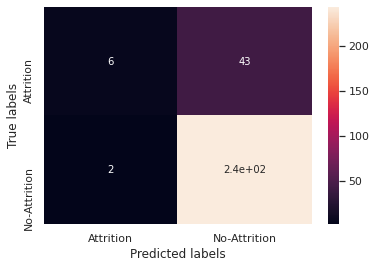

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_pasteclf = pasteknn_clf.predict(X_test)
print(metrics.accuracy_score(y_test,pred_pasteclf))

confusion = confusion_matrix(y_test, pred_pasteclf)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])
print(classification_report(y_test,pred_pasteclf))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_pasteclf)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.12244897959183673
F1Score    : 0.21052631578947364


In [ ]:
Classification_Scores.update({'Pasting on K Nearest Neighbors':[metrics.accuracy_score(y_test,pred_pasteclf),recall[0],fscore[0]]})

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.874


0.8741496598639455
              precision    recall  f1-score   support

           0       0.71      0.41      0.52        49
           1       0.89      0.97      0.93       245

    accuracy                           0.87       294
   macro avg       0.80      0.69      0.72       294
weighted avg       0.86      0.87      0.86       294



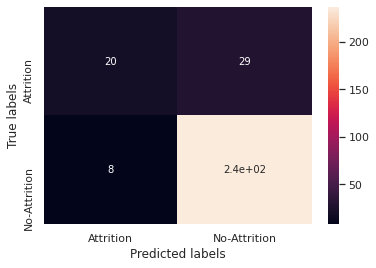

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_forestclf = forest.predict(X_test)
print(metrics.accuracy_score(y_test,pred_forestclf))

confusion = confusion_matrix(y_test, pred_forestclf)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])
print(classification_report(y_test,pred_forestclf))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_forestclf)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.40816326530612246
F1Score    : 0.5194805194805194


In [ ]:
Classification_Scores.update({'Random Forest':[metrics.accuracy_score(y_test,pred_forestclf),recall[0],fscore[0]]})

In [ ]:
forest.feature_importances_

array([0.05612496, 0.02624075, 0.04315737, 0.02616983, 0.03589584,
       0.0123828 , 0.0279523 , 0.10310876, 0.05178305, 0.04815743,
       0.04002886, 0.09636083, 0.03170729, 0.00531092, 0.02315672,
       0.        , 0.03521748, 0.04019039, 0.02465581, 0.03443379,
       0.04171828, 0.04728343, 0.02707221, 0.03912279, 0.00160267,
       0.00740376, 0.00623333, 0.00840456, 0.00375877, 0.00629285,
       0.00542625, 0.00644707, 0.02021041, 0.00309999, 0.00746466,
       0.0064238 ])

# Principal Component Analysis

In [1]:
from sklearn.decomposition import PCA

# intialize pca and logistic regression model
pca = PCA(n_components=0.95)

In [2]:
X_train_pca= pca.fit_transform(X_train)  
X_test_pca = pca.transform(X_test)

print(X_train_pca.shape)
print(y_train.shape)
print(X_test_pca.shape)
print(y_test.shape)

NameError: ignored

In [ ]:
X_valid_pca= pca.transform(X_valid)
X_trainval_pca=pca.fit_transform(X_trainval)

## KNN Classification with PCA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
train_score_array = []
valid_score_array = []

best_score = 0

for k in range(1,10):
    knn_clf = KNeighborsClassifier(k)
    knn_clf.fit(X_train_pca, y_train)
    train_score_array.append(knn_clf.score(X_train_pca, y_train))
    score = knn_clf.score(X_valid_pca, y_valid)
    valid_score_array.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'K': k}
            best_K = k

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, valid_score_array, c = 'b', label = 'Validation Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
knn_grid = KNeighborsClassifier(best_K)

scores = cross_val_score(knn_grid, X_trainval_pca, y_trainval, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

In [ ]:
k_range = list(range(1, 11))

param_grid = dict(n_neighbors=k_range)

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, return_train_score=True)

grid_search_knn.fit(X_trainval_pca, y_trainval)

df = pd.DataFrame(grid_search_knn.cv_results_)
%matplotlib inline
x_axis = range(1,11)
plt.plot(x_axis, df.mean_train_score, c = 'g', label = 'Train Score')
plt.plot(x_axis, df.mean_test_score, c = 'b', label = 'Validation Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('CV Score')

print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report

 
pred_knn = grid_search_knn.predict(X_test_pca)
print(metrics.accuracy_score(y_test,pred_knn))

confusion = confusion_matrix(y_test, pred_knn)
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_knn))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_knn)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

In [ ]:
Classification_Scores.update({'KNN Classification with PCA':[metrics.accuracy_score(y_test,pred_knn),recall[0],fscore[0]]})

## Logistic Regression with PCA

In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
valid_score_l1 = []
valid_score_l2 = []

best_score = 0
l1 = 'l1'
l2 = 'l2'

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c,solver='liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c,solver='lbfgs')
    
    log_l1.fit(X_train_pca, y_train)
    log_l2.fit(X_train_pca, y_train)
    
    train_score_l1.append(log_l1.score(X_train_pca, y_train))
    train_score_l2.append(log_l2.score(X_train_pca, y_train))
    
    score = log_l1.score(X_valid_pca, y_valid)
    valid_score_l1.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'C': c , 'penalty': l1}
            best_C = c
            best_Penalty = 'l1'
    
    score = log_l2.score(X_valid_pca, y_valid)
    valid_score_l2.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'C': c , 'penalty' : l2}
            best_C = c
            best_Penalty = 'l2'
    
plt.subplot(1,2,1)
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, valid_score_l1, label = 'Test score, penalty = l1')
plt.xscale('log')
plt.legend()
plt.subplot(1,2,2)
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, valid_score_l2, label = 'Test score, penalty = l2')
plt.xscale('log')
plt.legend()

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

In [ ]:
log_grid = LogisticRegression(penalty = best_Penalty, C = best_C)

scores = cross_val_score(log_grid, X_trainval_pca, y_trainval, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

In [ ]:
param_grid = {'penalty': ['l1','l2'],
             'C':  [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_log = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=10, return_train_score=True)

grid_search_log.fit(X_trainval_pca, y_trainval)

print("Best parameters: {}".format(grid_search_log.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_log.best_score_))

In [ ]:
pred_log = grid_search_log.predict(X_test_pca)
print(metrics.accuracy_score(y_test,pred_log))

confusion = confusion_matrix(y_test, pred_log)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_log))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_log)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

In [ ]:
Classification_Scores.update({'Logistic Regression with PCA':[metrics.accuracy_score(y_test,pred_log),recall[0],fscore[0]]})

## Linear SVC with PCA

In [ ]:
from sklearn.svm import LinearSVC

train_score_list = []
valid_score_list = []

best_score = 0

for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    linear_svc = LinearSVC(C=C, max_iter=10000)
    linear_svc.fit(X_train_pca,y_train)
    train_score_list.append(linear_svc.score(X_train_pca,y_train))
    score = linear_svc.score(X_valid_pca, y_valid)
    valid_score_list.append(score)
    if score > best_score:
        best_score = score
        best_parameters = {'C' : C}
        best_C = C

x_range = [0.001, 0.01, 0.1, 1, 10, 100]
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, valid_score_list, c = 'b', label = 'Validation Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('Regularization parameter')

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

In [ ]:
linear_svc_grid = LinearSVC(C = best_C, max_iter=10000)
scores = cross_val_score(linear_svc_grid, X_trainval_pca, y_trainval, cv = 10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_lsvc = GridSearchCV(LinearSVC(max_iter=10000), param_grid, cv=10, return_train_score=True)

grid_search_lsvc.fit(X_trainval_pca, y_trainval)

df = pd.DataFrame(grid_search_lsvc.cv_results_)
%matplotlib inline
plt.plot(x_range, df.mean_train_score, c = 'g', label = 'Train Score')
plt.plot(x_range, df.mean_test_score, c = 'b', label = 'Validation Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('Regularization Parameter')

print("Best parameters: {}".format(grid_search_lsvc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lsvc.best_score_))

In [ ]:
pred_linear_svc = grid_search_lsvc.predict(X_test_pca)
print(metrics.accuracy_score(y_test,pred_linear_svc))

confusion = confusion_matrix(y_test, pred_linear_svc)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])
print(classification_report(y_test,pred_linear_svc)) 

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_linear_svc)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

In [ ]:
Classification_Scores.update({'Linear SVC with PCA':[metrics.accuracy_score(y_test,pred_linear_svc),recall[0],fscore[0]]})

## SVC-rbf with PCA

In [ ]:
from sklearn.svm import SVC

train_score_list = []
valid_score_list = []

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svc_rbf = SVC(kernel='rbf', gamma=gamma, C=C)
        svc_rbf.fit(X_train_pca,y_train)
        train_score_list.append(svc_rbf.score(X_train_pca,y_train))
        score = svc_rbf.score(X_valid_pca, y_valid)
        valid_score_list.append(score)
        if score > best_score:
            best_score = score
            best_parameters = {'gamma': gamma , 'C' : C}
            best_Gamma = gamma
            best_C = C

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

In [ ]:
svc_rbf_grid = SVC(kernel='rbf', gamma = best_Gamma, C = best_C)

scores = cross_val_score(svc_rbf_grid, X_trainval_pca, y_trainval, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

In [ ]:
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_svcr = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=10, return_train_score=True)

grid_search_svcr.fit(X_trainval_pca, y_trainval)

print("Best parameters: {}".format(grid_search_svcr.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_svcr.best_score_))

In [ ]:
pred_rbf = grid_search_svcr.predict(X_test_pca)
print(metrics.accuracy_score(y_test,pred_rbf))

confusion = confusion_matrix(y_test, pred_rbf)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])
print(classification_report(y_test,pred_rbf))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_rbf)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

In [ ]:
Classification_Scores.update({'SVC-rbf with PCA':[metrics.accuracy_score(y_test,pred_rbf),recall[0],fscore[0]]})

## SCV-poly with PCA

In [ ]:
train_score_list = []
valid_score_list = []

best_score = 0

for degree in range(1,5):
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
            svc_poly = SVC(kernel='poly', degree = degree, C=C, gamma = gamma)
            svc_poly.fit(X_train_pca,y_train)
            train_score_list.append(svc_poly.score(X_train_pca,y_train))
            score = svc_poly.score(X_valid_pca, y_valid)
            valid_score_list.append(score)
            if score > best_score:
                best_score = score
                best_parameters = {'degree': degree , 'C' : C, 'gamma' : gamma}
                best_Degree = degree
                best_C = C
                best_gamma = gamma

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

In [ ]:
svc_poly_grid = SVC(kernel='poly',degree = best_Degree, C=best_C, gamma = best_Gamma)

scores = cross_val_score(svc_poly_grid, X_trainval_pca, y_trainval, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

In [ ]:
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'degree': [1,2,3,4,5]}

grid_search_svcp = GridSearchCV(SVC(kernel='poly'), param_grid, cv=10, return_train_score=True)

grid_search_svcp.fit(X_trainval_pca, y_trainval)

print("Best parameters: {}".format(grid_search_svcp.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_svcp.best_score_))

In [ ]:
pred_poly = grid_search_svcp.predict(X_test_pca)
print(metrics.accuracy_score(y_test,pred_poly))

confusion = confusion_matrix(y_test, pred_poly)

import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])
print(classification_report(y_test,pred_poly))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_poly)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

In [ ]:
Classification_Scores.update({'SVC-poly with PCA':[metrics.accuracy_score(y_test,pred_poly),recall[0],fscore[0]]})

## SVC Linear with PCA

In [ ]:
from sklearn.svm import SVC
train_score_list = []
valid_score_list = []

best_score = 0

for degree in range(1,5):
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
            svc_poly = SVC(kernel='linear', degree = degree, C=C, gamma = gamma)
            svc_poly.fit(X_train_pca,y_train)
            train_score_list.append(svc_poly.score(X_train_pca,y_train))
            score = svc_poly.score(X_valid_pca, y_valid)
            valid_score_list.append(score)
            if score > best_score:
                best_score = score
                best_parameters = {'degree': degree , 'C' : C, 'gamma' : gamma}
                best_Degree = degree
                best_C = C
                best_gamma = gamma

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

svc_poly_grid = SVC(kernel='linear',degree = best_Degree, C=best_C, gamma = best_gamma)

scores = cross_val_score(svc_poly_grid, X_trainval_pca, y_trainval, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

In [ ]:
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'degree': [1,2,3,4,5]}

grid_search_svcl = GridSearchCV(SVC(kernel='linear'), param_grid, cv=10, return_train_score=True)

grid_search_svcl.fit(X_trainval_pca, y_trainval)

print("Best parameters: {}".format(grid_search_svcl.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_svcl.best_score_))

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_linear = grid_search_svcl.predict(X_test_pca)
print(metrics.accuracy_score(y_test,pred_linear))

confusion = confusion_matrix(y_test, pred_linear)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])
print(classification_report(y_test,pred_linear))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_linear)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

In [ ]:
Classification_Scores.update({'SVC-linear with PCA':[metrics.accuracy_score(y_test,pred_linear),recall[0],fscore[0]]})

## Decision Tree with PCA

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_trainval_pca, y_trainval)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_trainval_pca, y_trainval)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_pca, y_test)))

In [ ]:
dtree_cv = DecisionTreeClassifier()
scores = cross_val_score(dtree_cv, X_trainval_pca, y_trainval, cv = 10, scoring = 'accuracy' )
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

In [ ]:
param_grid = {'criterion': ['gini','entropy'],
             'max_depth': [1,2,3,4,5,6,7,8,9,10],
             'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}

grid_search_dtree = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=10, return_train_score=True)

grid_search_dtree.fit(X_trainval_pca, y_trainval)

print("Best parameters: {}".format(grid_search_dtree.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_dtree.best_score_))

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_tree = grid_search_dtree.predict(X_test_pca)
print(metrics.accuracy_score(y_test,pred_tree))

confusion = confusion_matrix(y_test, pred_tree)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])
print(classification_report(y_test,pred_tree))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_tree)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

In [ ]:
Classification_Scores.update({'Decision Tree with PCA':[metrics.accuracy_score(y_test,pred_tree),recall[0],fscore[0]]})

## Neural Networks 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy

# fix random seed for reproducibility
numpy.random.seed(10)

In [ ]:
import tensorflow as tf

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=48, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
X_train=np.asarray(X_train)
y_train = np.asarray(y_train)
X_test=np.asarray(X_test)
y_test = np.asarray(y_test)

In [ ]:
from tensorflow import keras
neural_model=model.fit(X_train, y_train, epochs=150, batch_size=10)

In [ ]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
plt.figure(figsize=(56,5))
Classification_Scores= pd.DataFrame(Classification_Scores)
Classification_Scores.plot.bar(figsize=(20,10))

In [ ]:
import pandas as pd
s= pd.Series(['Accuracy','Recall','F1 Score'])
Classification_Scores.set_index([s])

Our evaluation strategy is based on the having best recall value and best F1-Score as the dataset is imbalanced and (as we do not wish to misclassify the employess which are likely to cause `attrition` i.e. have less false negatives in our confusion matrix)

From the above graph, it can be said that we are getting an accuracy of 0.88, recall score of 0.37 and f1-score of 0.51 for
 `SVM - Poly` and we are also getting around same values for Pasting on Decision Trees

Thus, it can be used as an ideal classifier for predicting the attrition rate.

*Please find the adaboost models below. Sorry for the misplacement*

# Adaboost with Decision Tree

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
train_score_array = []
test_score_array = []
best_score=0


for n in range(1,10):
    for learning_rate in [0.001,0.01]:
        for n_estimators in [50,100]:
            dtree_reg=DecisionTreeClassifier(max_depth=n)
            ada_reg_dtree = AdaBoostClassifier(dtree_reg, n_estimators=n_estimators,learning_rate=learning_rate,random_state=0)
            ada_reg_dtree.fit(X_trainval, y_trainval)
            train_score_array.append(ada_reg_dtree.score(X_trainval, y_trainval))
            test_score_array.append(ada_reg_dtree.score(X_test, y_test))
            score=ada_reg_dtree.score(X_test, y_test)
            if(score>best_score):
                best_score=score
                best_parameters = {'learning_rate': learning_rate, 'max_depth': n,'n_estimators':n_estimators}

print(best_parameters)

{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100}


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

dt_reg = DecisionTreeClassifier(max_depth=3,random_state=0)
ada_reg_dt = AdaBoostClassifier(dt_reg, n_estimators=100,learning_rate=0.01,random_state=0)

ada_reg_dt.fit(X_trainval,y_trainval)

y_pred=ada_reg_dt.predict(X_test)

print('Train score: {:.4f} %'.format(ada_reg_dt.score(X_trainval, y_trainval)*100))
print('Test score: {:.4f} %'.format(ada_reg_dt.score(X_test, y_test)*100))

Train score: 86.1547 %
Test score: 84.1167 %


0.8411669367909238
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       318
           1       0.80      0.89      0.84       299

    accuracy                           0.84       617
   macro avg       0.84      0.84      0.84       617
weighted avg       0.85      0.84      0.84       617



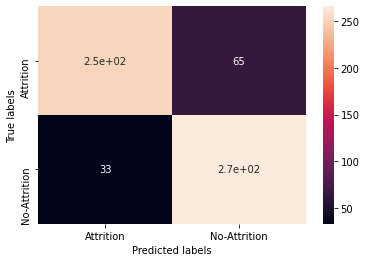

In [ ]:
pred_ada = ada_reg_dt.predict(X_test)
print(metrics.accuracy_score(y_test,pred_ada))

confusion = confusion_matrix(y_test, pred_ada)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_ada))

# Adaboost with KNN

In [ ]:
from sklearn.svm import SVC
svc_clf=SVC(C=100,gamma=1, kernel='linear',probability=True)
ada_clf_svc = AdaBoostClassifier(svc_clf, n_estimators=500,learning_rate=0.1,random_state=0)
ada_clf_svc.fit(X_trainval, y_trainval)

y_pred=ada_clf_svc.predict(X_test)


In [ ]:
print('Train score: {:.4f} %'.format(ada_clf_svc.score(X_trainval, y_trainval)*100))
print('Test score: {:.4f} %'.format(ada_clf_svc.score(X_test, y_test)*100))

Train score: 84.1198 %
Test score: 83.1522 %


0.8315217391304348
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        62
           1       0.83      1.00      0.91       306

    accuracy                           0.83       368
   macro avg       0.42      0.50      0.45       368
weighted avg       0.69      0.83      0.76       368



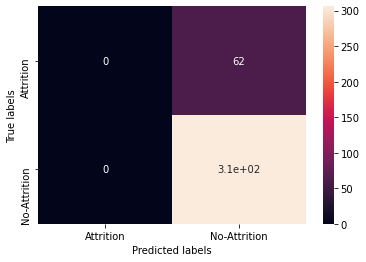

In [ ]:
pred_adasvc = ada_clf_svc.predict(X_test)
print(metrics.accuracy_score(y_test,pred_adasvc))

confusion = confusion_matrix(y_test, pred_adasvc)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Attrition', 'No-Attrition'])
ax.yaxis.set_ticklabels(['Attrition', 'No-Attrition'])

print(classification_report(y_test,pred_adasvc))